In [8]:
import pandas as pd
import numpy as np
eus = pd.read_csv("Eu.new.CaQTLS.tsv", sep="\t", header=0)
eus = eus[eus["IsUsed"] & eus["Inside_Peak"]==1]
print(eus.columns)
#eus = eus[eus["Inside_Peak"]==2]
eus = eus[(eus["Log10_BF"]>3) | (eus["Log10_BF"]<-1)]
print(eus.shape)
eus["labeln"] = 1
eus.loc[eus["Log10_BF"]>3,"labeln"]=1
eus.loc[eus["Log10_BF"]<-1,"labeln"]=-1
eus = eus[['chr', 'Pos', 'Ref', 'Alt', 'RsID', 'labeln']]
eus["my_rsid"] = eus["chr"]+"."+eus["RsID"].astype(str)


Index(['chr', 'Pos', 'Ref', 'Alt', 'RsID', 'Peak', 'AF', 'Inside_Peak',
       'P_Lead', 'Beta', 'SE', 'Log10_BF', 'ENCSR637XSC.logfc.mean',
       'ENCSR637XSC.jsd_sign.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR637XSC.sub.50M.logfc.mean', 'ENCSR637XSC.sub.50M.jsd_sign.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR637XSC.sub.50M.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'ENCSR000EMT.logfc.mean', 'ENCSR000EMT.jsd_sign.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean',
       'ENCSR000EMT.abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'enformer_recomputed', 'DNASE_SAD', 'DNASE_SAR', 'IsUsed'],
      dtype='object')
(121766, 28)


In [9]:
afrs = pd.read_csv("Afr.CaQTLS.new.tsv", sep="\t", header=0)
afrs = afrs[afrs["IsUsed"]]
afrs[["chr_hg19", "pos_hg19", "ref_hg19", "alt_hg19"]] = afrs["id_hg19"].str.split("_", expand=True)
threshold = 1 / (10**(6))
print(afrs.shape)
#print(afrs.head())
#afrs = afrs[(afrs["label"]==1) | (afrs["pval"]>1e-3)]
print(afrs.shape)
afrs["labeln"] = 1
afrs.loc[afrs["label"]==1,"labeln"]=1
afrs.loc[afrs["pval"]>1e-3,"labeln"]=-1
afrs = afrs[['chr_hg19', 'pos_hg19', 'ref_hg19', 'alt_hg19', 'dbsnp_rsid', 'labeln']]
afrs["my_rsid"] = afrs["chr_hg19"]+"."+afrs["dbsnp_rsid"].astype(str)
print(afrs.head())

(109646, 51)
(109646, 51)
   chr_hg19 pos_hg19 ref_hg19 alt_hg19   dbsnp_rsid  labeln           my_rsid
2      chr1   805556        T        A   rs72631880      -1   chr1.rs72631880
4      chr1   840753        T        C    rs4970382      -1    chr1.rs4970382
8      chr1   842250        A        G  rs148658266      -1  chr1.rs148658266
9      chr1   842362        C        T   rs28540380       1   chr1.rs28540380
12     chr1   856583        G        A  rs141671872       1  chr1.rs141671872


In [26]:
kaur_afr=pd.read_csv("../final_figures/afr.inpeaks.kaur.tsv", sep="\t", header=0)
#print(kaur_afr.head(1))
kaur_afr["my_rsid"] = kaur_afr["chromosome_x"]+"."+kaur_afr["rsid"].astype(str)
kaur_afr["log10p"] = -1*np.log(kaur_afr["pvalue"])

#print(sum(np.isnan(kaur_afr["rsid"].astype(str))))
#kaur_afr[""]

In [27]:
kaur_eu=pd.read_csv("../final_figures/eu.inpeaks.kaur.tsv", sep="\t", header=0)
#print(kaur_afr.head(1))
kaur_eu["my_rsid"] = kaur_eu["chromosome_x"]+"."+kaur_eu["rsid"].astype(str)
kaur_eu["log10p"] = -1*np.log(kaur_eu["pvalue"])

#print(sum(np.isnan(kaur_afr["rsid"].astype(str))))
#kaur_afr[""]

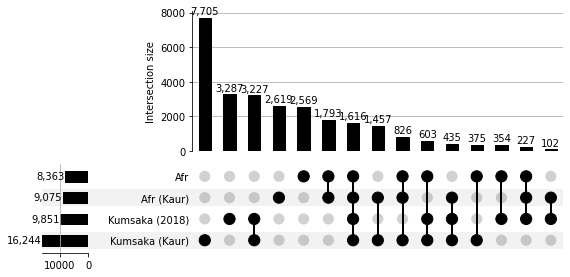

In [33]:
from upsetplot import from_contents
all_rsids={}

all_rsids["Kumsaka (Kaur)"] = list(set(kaur_eu[kaur_eu["log10p"]>12]["my_rsid"]))
all_rsids["Kumsaka (2018)"] = list(set(eus[eus["labeln"]==1]["my_rsid"]))
all_rsids["Afr (Kaur)"] = list(set(kaur_afr[kaur_afr["log10p"]>12]["my_rsid"]))
all_rsids["Afr"] = list(set(afrs[afrs["labeln"]==1]["my_rsid"]))

import matplotlib.pyplot as plt
from upsetplot import plot, generate_counts
plot(from_contents(all_rsids), sort_by='cardinality',show_counts="{:,}")
plt.show()

<AxesSubplot:>

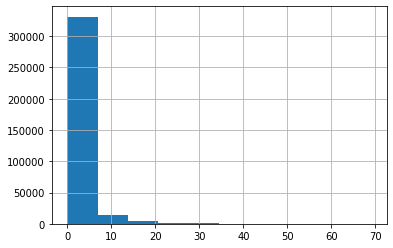

In [31]:
kaur_afr["log10p"].hist()

<AxesSubplot:>

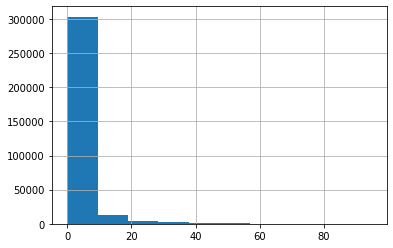

In [30]:
kaur_eu["log10p"].hist()